torch.Size([3, 32, 32])
tensor([False, False, False])
tensor([0., 0., 0.])
0
torch.Size([3, 32, 32])
tensor([False, False, False])
tensor([0., 0., 0.])
0


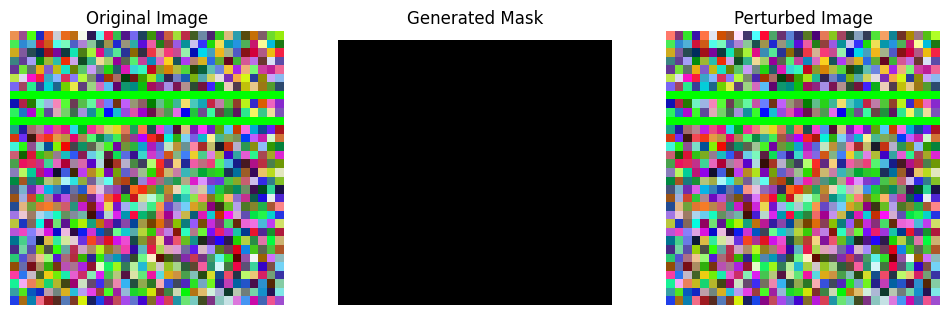

In [17]:
import torch
import matplotlib.pyplot as plt

# Function definitions from before
def generate_mask(image, data_grad):
    print(image.shape)
    green_rows = (image[:, 1, :] == 1.0).all(dim=1)
    print(green_rows)
    grad_magnitude = data_grad.abs().sum(dim=(1, 2))
    green_grad_magnitude = grad_magnitude * green_rows.float()
    print(green_grad_magnitude)
    max_grad_row_index = green_grad_magnitude.argmax().item()
    mask = torch.zeros_like(image)
    _, _, width = image.size()
    middle_col = width // 2
    print(max_grad_row_index)
    mask[:, max_grad_row_index, :] = 1
    return mask

def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    mask = generate_mask(image, data_grad)
    sign_data_grad = sign_data_grad * mask
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

def visualize_image(image, title="Image"):
    image = image.permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC format for matplotlib
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

def test_generate_mask_and_visualize(image, data_grad):
    mask = generate_mask(image, data_grad)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    visualize_image(image, title="Original Image")
    
    plt.subplot(1, 3, 2)
    visualize_image(mask, title="Generated Mask")
    
    epsilon = 0.1
    perturbed_image = fgsm_attack(image, epsilon, data_grad)
    
    plt.subplot(1, 3, 3)
    visualize_image(perturbed_image, title="Perturbed Image")
    
    plt.show()

# Generating a sample image and data gradient
# Creating a dummy image with random values and a specific green row
image = torch.rand((3, 32, 32))  # Random image with 3 channels and 32x32 size
# make first row [0,1,0]
for _ in image:
    for i in range(32):
        image[:,7, i] = torch.tensor([0.0, 1.0, 0.0])
for _ in image:
    for i in range(32):
        image[:, 10, i] = torch.tensor([0.0, 1.0, 0.0])
# Creating a dummy data gradient with random values
data_grad = torch.randn((3, 32, 32))

# Running the test function
test_generate_mask_and_visualize(image, data_grad)
